[View in Colaboratory](https://colab.research.google.com/github/itsSKG/DrAIvex/blob/master/Project2.ipynb)

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import mpl_toolkits
%matplotlib inline

In [5]:
! pip install pydrive
# these classes allow you to request the Google drive API
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth 
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
file_id_train = '106NKNFoaR4RM690elN6_zuLWubpba4TQ'
file_id_testX = '1feGQO_rsRaplh9thTMBPESWtHvBLymHL'
file_id_testY = '1hap9oraPBrvRTuh9FgdUJ0rSEuZsnIJ2'
downloaded_train = drive.CreateFile({'id': file_id_train})
downloaded_testX = drive.CreateFile({'id': file_id_testX})
downloaded_testY = drive.CreateFile({'id': file_id_testY})

# allows you to temporarily load your file in the notebook VM

# assume the file is called file.csv and it's located at the root of your drive
downloaded_train.GetContentFile('file_train.csv')
downloaded_testX.GetContentFile('file_testX.csv')
downloaded_testY.GetContentFile('file_testY.csv')


# https://drive.google.com/file/d/106NKNFoaR4RM690elN6_zuLWubpba4TQ/view?usp=sharing --> train
# https://drive.google.com/file/d/1feGQO_rsRaplh9thTMBPESWtHvBLymHL/view?usp=sharing --> test_X
# https://drive.google.com/file/d/1hap9oraPBrvRTuh9FgdUJ0rSEuZsnIJ2/view?usp=sharing --> test_Y

In [0]:
train = pd.read_csv('file_train.csv')
testX = pd.read_csv('file_testX.csv')
testY = pd.read_csv('file_testY.csv')

In [7]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
train.describe(include = "all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Rouse, Mr. Richard Henry",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [10]:
pd.isnull(train).sum()

# to much data from 'Cabin' missing

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

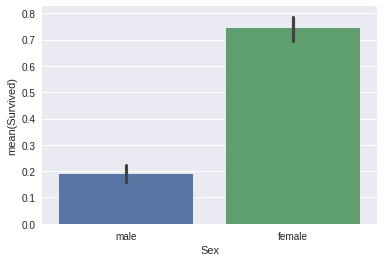

In [11]:
# Data Visualization

sns.barplot(x="Sex", y="Survived", data=train)

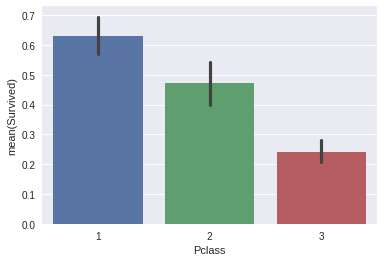

In [12]:
sns.barplot(x="Pclass", y="Survived", data=train)

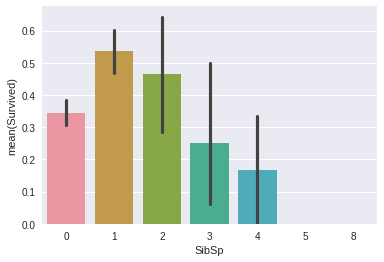

In [13]:
sns.barplot(x="SibSp", y="Survived", data=train)

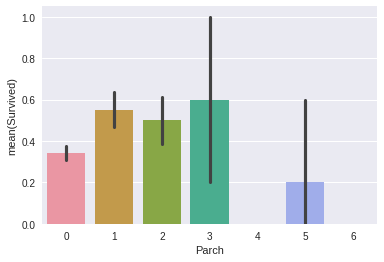

In [14]:
sns.barplot(x="Parch", y="Survived", data=train)

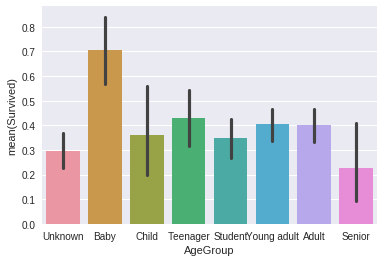

In [15]:
train["Age"] = train["Age"].fillna(-0.5)
testX["Age"] = testX["Age"].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, 100]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young adult', 'Adult', 'Senior']
train['AgeGroup'] = pd.cut(train["Age"], bins, labels = labels)
testX['AgeGroup'] = pd.cut(train["Age"], bins, labels = labels)

sns.barplot(x="AgeGroup", y="Survived", data=train)

# sab mar jaege, bacche bach jaege

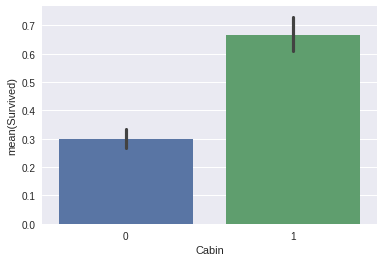

In [16]:
train["Cabin"] = (train["Cabin"].notnull().astype('int'))
testX["Cabin"] = (testX["Cabin"].notnull().astype('int'))
sns.barplot(x="Cabin", y="Survived", data=train)

In [0]:
# df = pd.concat([testX, testY], axis = 1)
# df.head()

In [0]:
# sns.barplot(x="Embarked", y="Survived", data = df)

In [0]:
# train.describe(include = "all")

In [20]:
# Number of people embarked in:
southampton = train[train["Embarked"] == "S"].shape[0]
print(southampton)
queenstown = train[train["Embarked"] == "Q"].shape[0]
print(queenstown)
cherbourg = train[train["Embarked"] == "C"].shape[0]
cherbourg

644
77


168

In [0]:
train = train.fillna({"Embarked": "S"})
embarked_map = {'S': 1, 'C': 2, 'Q': 3}
train['Embarked'] = train['Embarked'].map(embarked_map)
testX['Embarked'] = testX['Embarked'].map(embarked_map)
# train.head()

In [22]:
sex_map = {'male': 0, 'female': 1}
train['Sex'] = train['Sex'].map(sex_map)
testX['Sex'] = testX['Sex'].map(sex_map)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,1,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,2,Adult
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,1,Young adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,1,1,Young adult
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,1,Young adult


In [23]:
train.describe(include= 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
count,891.000000,891.000000,891.000000,891,891.000000,891.000000,891.000000,891.000000,891,891.000000,891.000000,891.000000,891
unique,NaN,NaN,NaN,891,NaN,NaN,NaN,NaN,681,NaN,NaN,NaN,8
top,NaN,NaN,NaN,"Rouse, Mr. Richard Henry",NaN,NaN,NaN,NaN,CA. 2343,NaN,NaN,NaN,Young adult
freq,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,7,NaN,NaN,NaN,220
mean,446.000000,0.383838,2.308642,NaN,0.352413,23.699966,0.523008,0.381594,NaN,32.204208,0.228956,1.361392,NaN
std,257.353842,0.486592,0.836071,NaN,0.477990,17.731181,1.102743,0.806057,NaN,49.693429,0.420397,0.635673,NaN
min,1.000000,0.000000,1.000000,NaN,0.000000,-0.500000,0.000000,0.000000,NaN,0.000000,0.000000,1.000000,NaN
25%,223.500000,0.000000,2.000000,NaN,0.000000,6.000000,0.000000,0.000000,NaN,7.910400,0.000000,1.000000,NaN
50%,446.000000,0.000000,3.000000,NaN,0.000000,24.000000,0.000000,0.000000,NaN,14.454200,0.000000,1.000000,NaN
75%,668.500000,1.000000,3.000000,NaN,1.000000,35.000000,1.000000,0.000000,NaN,31.000000,0.000000,2.000000,NaN
